# Advanced Modeling of Groundwater Flow (GW3099)
![alt text](..\img\header.jpg)

# Exercise 1: MODFLOW 6
The purpose of this exercise is to use read and plot the MODFLOW 6 results using Flopy.

In [12]:
%matplotlib inline
from __future__ import print_function
import sys
import os
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

import config

print(sys.version)
print('python executable: {}'.format(sys.executable))
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
python executable: C:\Users\langevin\Anaconda3\python.exe
numpy version: 1.14.1
matplotlib version: 2.1.2
flopy version: 3.2.9


In [13]:
model_ws = './ex01-completed'
s = flopy.mf6.MFSimulation().load(sim_ws=model_ws)
modelname = s.model_names[0]

Directory structure already exists for simulation path Z:\langevin\training\AdvancedModeling2018\gw3099_classrepo.git\exercises\MODFLOW6\.
Directory structure already exists for simulation path Z:\langevin\training\AdvancedModeling2018\gw3099_classrepo.git\exercises\MODFLOW6\.\ex01-completed
loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package wel...
    loading package riv...
    loading package rch...
    loading package oc...
  loading ims package ex02...


In [14]:
print('Model name is {}'.format(modelname))

Model name is ex01


In [15]:
gwf = s.get_model(modelname)

In [16]:
nlay = gwf.dis.nlay.get_data()
nrow = gwf.dis.nrow.get_data()
ncol = gwf.dis.ncol.get_data()
print(nlay, nrow, ncol)

3 21 20


In [17]:
gwf.dis.top = 450

In [18]:
gwf.dis.top.array

array([[450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450., 450., 450., 450., 450., 450.,
        450., 450., 450., 450., 450., 450., 450., 450., 450.],
       [450., 450., 450., 450., 450., 450

In [19]:
gwf.riv

package_name = riv_0
filename = ex01.riv
package_type = riv
model_or_simulation_package = model
model_name = ex01

Block dimensions
--------------------
maxbound
{internal}
(21)


Block period
--------------------
stress_period_data
{internal}
(rec.array([((0, 0, 19), 320., 100000., 318.),
           ((0, 1, 19), 320., 100000., 318.),
           ((0, 2, 19), 320., 100000., 318.),
           ((0, 3, 19), 320., 100000., 318.),
           ((0, 4, 19), 320., 100000., 318.),
           ((0, 5, 19), 320., 100000., 318.),
           ((0, 6, 19), 320., 100000., 318.),
           ((0, 7, 19), 320., 100000., 318.),
           ((0, 8, 19), 320., 100000., 318.),
           ((0, 9, 19), 320., 100000., 318.),
           ((0, 10, 19), 320., 100000., 318.),
           ((0, 11, 19), 320., 100000., 318.),
           ((0, 12, 19), 320., 100000., 318.),
           ((0, 13, 19), 320., 100000., 318.),
           ((0, 14, 19), 320., 100000., 318.),
           ((0, 15, 19), 320., 100000., 318.),
           ((

In [20]:
# Load binary grid file
fname = os.path.join(model_ws, modelname + '.dis.grb')
grd = flopy.utils.MfGrdFile(fname, verbose=False)
sr = grd.get_spatialreference()

# load the heads and budget files
fname = os.path.join(model_ws, modelname + '.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()

fname = os.path.join(model_ws, modelname + '.cbc')
cbb = flopy.utils.CellBudgetFile(fname, precision='double')
spdis = cbb.get_data(text='DATA-SPDIS')[0]
qx = spdis['qx'].reshape((nlay, nrow, ncol))
qy = spdis['qy'].reshape((nlay, nrow, ncol))
xg = sr.xcentergrid
yg = sr.ycentergrid

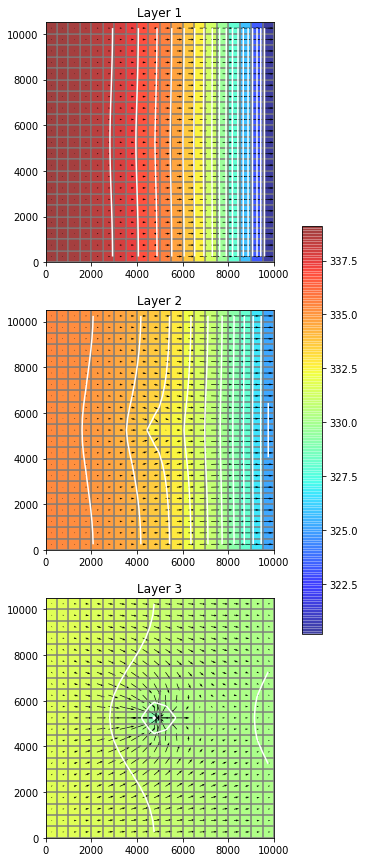

In [22]:
# plot the results for each layer
fig, axes = plt.subplots(nrows=nlay, ncols=1, figsize=(10, 15))
vmin = head.min()
vmax = head.max()
levels = np.linspace(vmin, vmax, 20)

for ilay in range(nlay):
    ax = axes[ilay]
    #ax = fig.add_subplot(1, nlay, ilay + 1, aspect='equal')
    ax.set_title('Layer {}'.format(ilay + 1))
    ax.set_aspect('equal')
    modelmap = flopy.plot.ModelMap(sr=sr, layer=ilay, ax=ax)
    quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5, 
                                   vmin=vmin, vmax=vmax, cmap='jet')
    linecollection = modelmap.plot_grid()
    contour_set = modelmap.contour_array(head, levels=levels, colors='white')
    #quiver = modelmap.plot_discharge(frf, fff, head=head)
    ax.quiver(xg, yg, qx[ilay], qy[ilay])
cb = fig.colorbar(quadmesh, ax=axes, shrink=0.5)